In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../')
from spinosaurus.density_shape_correlators_fftw import DensityShapeCorrelators
from spinosaurus.shape_shape_correlators_fftw import ShapeShapeCorrelators

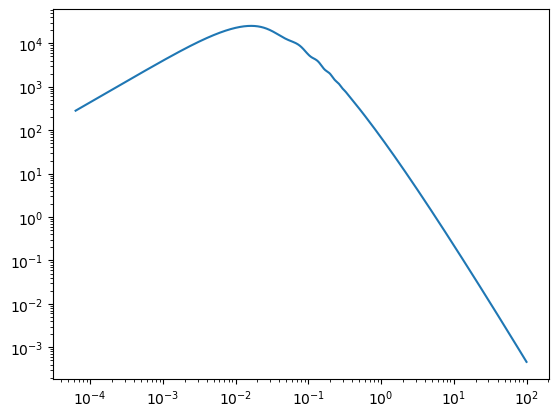

In [25]:
klin, plin = np.loadtxt('../data/power_lin.dat', unpack=True)

plt.loglog(klin, plin)

## Compute some density-shape spectra.

There are many of them!

In [26]:
lpt = DensityShapeCorrelators(klin, plin)

gdtable = lpt.make_gdtable(kmin=3e-3, kmax=0.4, nk=50)

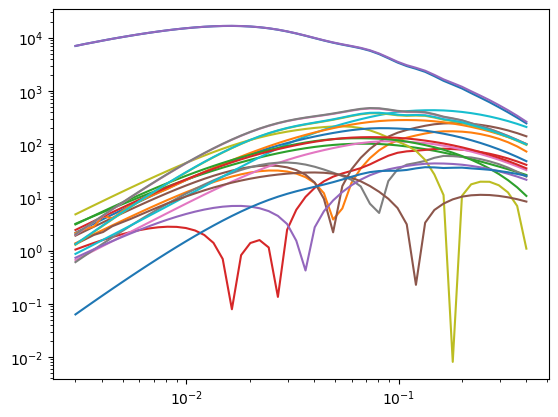

In [27]:
kv = gdtable[:,0]

for ii in range(21):

    plt.loglog(kv, np.abs(gdtable[:,ii+1]) )

## Compute the galaxy density-shape spectrum for a fixed set of bias parameters.

The bias vectors take the form:

b1, b2, bs, b3, alpha_d = density_bvec

c_s, c_ds, c_s2, c_L2, c_3, c_dt, alpha_s = shape_bvec

In [28]:
# Note: these bias values are made up!
density_bvec = [1, 0.5, -0.1, 0, 0]
shape_bvec = [0.1, 0.05, 0.1, 0.04, -0.03, 0.05, 0]

kv, pgd = lpt.combine_bias_terms_density_shape(density_bvec,shape_bvec)

Text(0, 0.5, '$k P_{gI}(k)$ [$h^{-2}$ Mpc$^{2}$]')

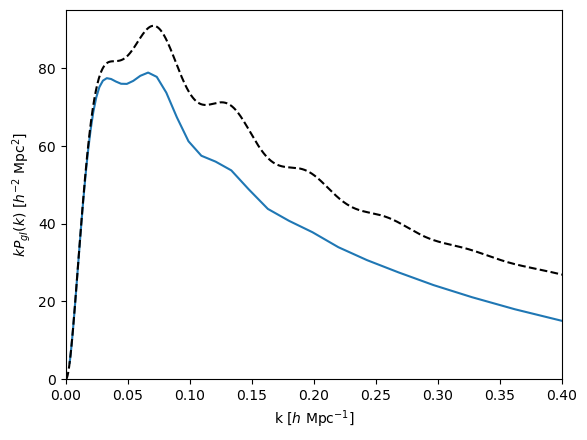

In [34]:
plt.plot(kv, kv * pgd)

plt.plot(klin, klin * 2/3 * (1 + density_bvec[0]) * shape_bvec[0] * plin, 'k--',label='linear')

plt.xlim(0,0.4)
plt.ylim(0,95)

plt.xlabel(r'k [$h$ Mpc$^{-1}$]')
plt.ylabel(r'$k P_{gI}(k)$ [$h^{-2}$ Mpc$^{2}$]')

## Shape-Shape Examples

To come. See also make_data_plots.ipynb for further examples.